Ridge Regression for Polynomial 2D Functions

Each line in the data sets consists of a data entry `(x,y)` with a 2D point `x` and a 1D function output `y`.

In [1]:
# Load required packages and datasets. Do not modify.
import numpy as np

def load_dataset(path):
    data = np.loadtxt(path)
    X, y = data[:, :2], data[:, 2]
    
    return X, y
    

X_lin, y_lin = load_dataset("dataLinReg2D.txt")
X_quad, y_quad = load_dataset("dataQuadReg2D.txt")
X_noise, y_noise = load_dataset("dataQuadReg2D_noisy.txt")

1) Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`). You may also experiment with other feature transformations, e.g. third-order polynomials.

In [2]:
def make_features(X, ftype):
    n, d = X.shape
    if ftype == 'lin': # Linear feature transformation (including intercept)
        Phi = np.empty((n, d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X

    elif ftype == 'quad':  # Quadratic feature transformation
        # Implement for task 1.1.
        X = np.hstack((X,(X[:,1]**2).reshape((n,1))))
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        
        _n, _d = X.shape

        Phi = np.empty((_n, _d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
        
    elif ftype == 'cubic':  # Quadratic feature transformation
        # Implement for task 1.1.
        X = np.hstack((X,(X[:,1]**2).reshape((n,1)),(X[:,1]**3).reshape((n,1))))
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        
        _n, _d = X.shape

        Phi = np.empty((_n, _d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
  
    elif ftype == 'nasa':
        # Implement for task 2.2.
        
        X = np.hstack((X,(X[:,1]**2).reshape((n,1)),(X[:,1]**3).reshape((n,1)),(X[:,1]**4).reshape((n,1))))
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        
        _n, _d = X.shape

        Phi = np.empty((_n, _d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
        pass
    
    else:
        raise Exception('Feature type {} not implemented yet'.format(ftype))
    
    return Phi

2) Ridge Regression to fit a polynomial function to the data sets with the regularization parameter `lambda_` and feature type `ftype`.

Fill out the methods in `RidgeRegression` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed. You need to store the vector of regression coefficients in the field `self.beta`.

In [3]:
class RidgeRegression(object):
    def __init__(self, lambda_, ftype):
        self.lambda_ = lambda_
        self.ftype = ftype
        self.beta = None  # Learned regression coefficients.
    
    def fit(self, X, y):
        """
        X is an array of shape (n, d), 
            where n is the number of samples and d is the number of features.
        y is an array of shape (n,)
        """
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        self.beta = np.zeros(Phi.shape[1])
        I = np.eye(Phi.shape[1])

        self.beta = (np.linalg.inv(Phi.T @ Phi + self.lambda_ * I) @ (Phi.T @ y))

        
    def predict(self, X):
        """
        X is an array with shape (n, d).
        The method returns an array of shape (n,).
        """
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        return (Phi @ self.beta)

3) Implementation of the function `MSE` to compute the mean squared error. `y_pred` and `y_true` are the vectors of predicted and true function outputs respectively with shape `(n,)`, where `n` is the number of samples. The function returns a single float.

In [4]:
def MSE(y_pred, y_true):
    # Implement your solution here.
    return (np.square(np.subtract(y_pred, y_true)).mean())

4) Evaluation of Ridge Regression model with linear features on the linear `(X_lin, y_lin)` data set. Try to find a good `lambda_`. How does it perform with quadratic features on this data set? Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

In [5]:
def train_evaluate(regression_model, X, y):
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)
    _MSE = MSE(yhat,y)
    print('MSE:', _MSE)
    return _MSE

    
def plot_data_and_model(regression_model, X, y):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d.axes3d import Axes3D
    %matplotlib notebook
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y, marker = 'o')
    
    xmin = X.min(0)
    xmax = X.max(0)

    x0grid, x1grid = np.mgrid[xmin[0]:xmax[0]:.3, xmin[1]:xmax[1]:.3]

    xdim0, xdim1 = np.shape(x0grid)
    xsize = np.size(x0grid)

    x0hat = x0grid.flatten()
    x1hat = x1grid.flatten()
    x0hat = x0hat.reshape((np.size(x0hat), 1))
    x1hat = x1hat.reshape((np.size(x1hat), 1))
    xhat = np.append(x0hat, x1hat, 1)
    xhatfv = make_features(xhat, regression_model.ftype)
    yhat = xhatfv.dot(regression_model.beta)
    ygrid = yhat.reshape((xdim0, xdim1))
    ax.plot_surface(x0grid, x1grid, ygrid, cmap='RdPu')
    ax.auto_scale_xyz([xmin[0], xmax[0]], [xmin[1], xmax[1]], [y.min(), y.max()])
    fig.show()
    
def plot_bargraph(_ftype, _X, _y, xtitle, ytitle, title):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    l = list()
    for i in range (7):
        _i = np.power(10,i)*0.0001
        regression_lin = RidgeRegression(lambda_=_i, ftype=_ftype) 
        l.append((_i,train_evaluate(regression_lin, _X, _y)))
        
    labels, y_axis = zip(*l)
    x_axis = np.arange(len(labels)) 
    width =0.9

    plt.bar(x_axis, y_axis, width, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red')

    for i, y_axis in enumerate(y_axis):
        plt.text(i, y_axis/2, str(np.around(y_axis,4)), ha='center', fontsize =8)

    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.xticks(x_axis, labels)
    plt.title(title);

In [6]:
#Plain gradient descent with backtracking line search

class optimize_lambda():
    def __init__(self, ftype, X, y):
        self.X = X
        self.y = y
        self.ftype = ftype
    
        self.X = make_features(self.X, self.ftype)
        self.I = np.eye(self.X.shape[1])

    def f(self, l):
        w = np.linalg.inv(self.X.T @ self.X + l * self.I) @ (self.X.T @ self.y)
        return (np.transpose(self.y-(self.X @ w))@(self.y-(self.X @ w)))

    def df(self, l):
        gamma, V = np.linalg.eig(self.X.T @ self.X)
        D = np.linalg.inv(np.diag(l+gamma))
        A = 2*(V.T @ self.X.T @ self.y)
        B = (V.T @ self.X.T @ self.X @ V)
        Q = (self.y.T @ self.X @ V)
        R = (self.y.T @ self.X @ V)
        return ((Q - (R @ D @ B)) @ (np.square(D) @ A))
    
    def optimize(self):
        theta =0.01
        gp = 1.2
        gm = 0.5
        lmax = np.infty
        gls = 0.01
        alpha = 1
        x = 1  
        
        while True:

            delta = -self.df(x)#/np.linalg.norm(df(x))

            c1 = self.f(x+(alpha*delta))
            c2 = self.f(x)+(gls**alpha*delta)*np.transpose(self.df(x))

            while (c1 > c2):
                alpha = gm * alpha
                print('alpha',alpha)

            x = x + (alpha*delta)
            alpha = min((alpha*gp), lmax)

            if (np.abs(alpha*delta)<theta):
                break

        print ("lambda* for '%s' is %f"%(self.ftype,x))
        return x

lin_model  = optimize_lambda('lin',X_lin,y_lin)
qlin_model  = optimize_lambda('quad',X_lin,y_lin)
quad_model = optimize_lambda('quad',X_quad,y_quad)
noise_model= optimize_lambda('lin', X_noise,y_noise)

lambda* for 'lin' is 0.001567
MSE: 0.013811230680995778


<IPython.core.display.Javascript object>


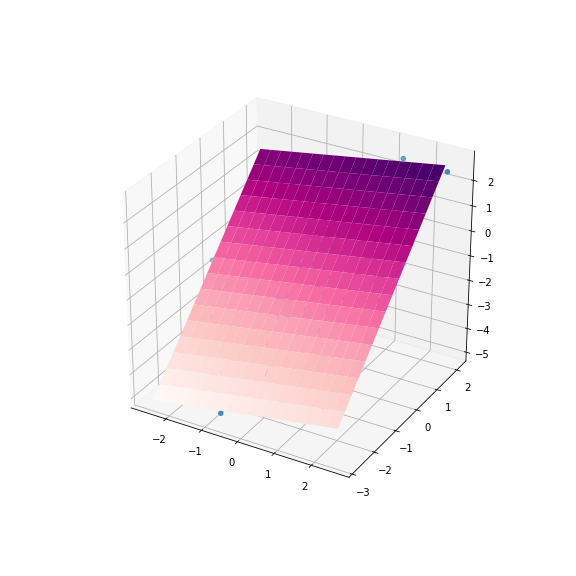

In [25]:
regression_lin = RidgeRegression(lambda_=lin_model.optimize(), ftype='lin')
train_evaluate(regression_lin, X_lin, y_lin)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_lin, X_lin, y_lin)

MSE: 0.010247981456835763
MSE: 0.01024798176725546
MSE: 0.01024801280165061
MSE: 0.010251108682211331
MSE: 0.010553288875760777
MSE: 0.03463661345293031
MSE: 0.5949092533289886


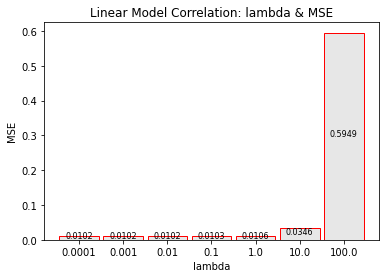

In [8]:
plot_bargraph('lin',X_lin, y_lin, 'lambda', 'MSE', 'Linear Model Correlation: lambda & MSE')

lambda* for 'quad' is 0.001908
MSE: 0.06828328234494159


<IPython.core.display.Javascript object>


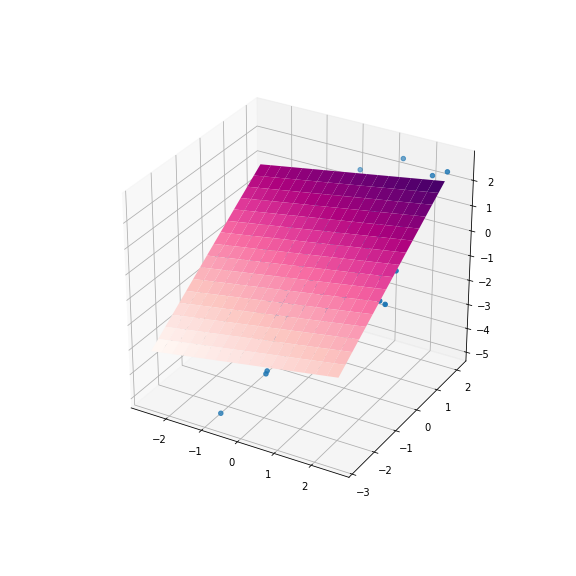

In [24]:
regression_qlin = RidgeRegression(lambda_=qlin_model.optimize(), ftype='quad')
train_evaluate(regression_qlin, X_lin, y_lin)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_qlin, X_lin, y_lin)

MSE: 0.010246251836826483
MSE: 0.010246252010676762
MSE: 0.010246269392571268
MSE: 0.010248004453537629
MSE: 0.01041842845337545
MSE: 0.02478639004526822
MSE: 0.4592903219574815


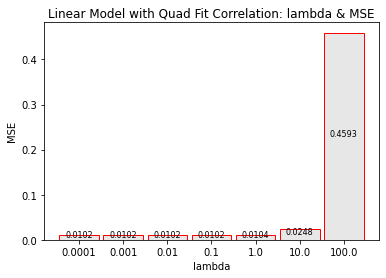

In [10]:
plot_bargraph('quad',X_lin, y_lin, 'lambda', 'MSE', 'Linear Model with Quad Fit Correlation: lambda & MSE')

5) Trying to find a good model (including features and suitable `lambda_` parameters) for the quadratic data set `(X_quad, y_quad)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

lambda* for 'quad' is 0.000034
MSE: 3.082794786198675


<IPython.core.display.Javascript object>


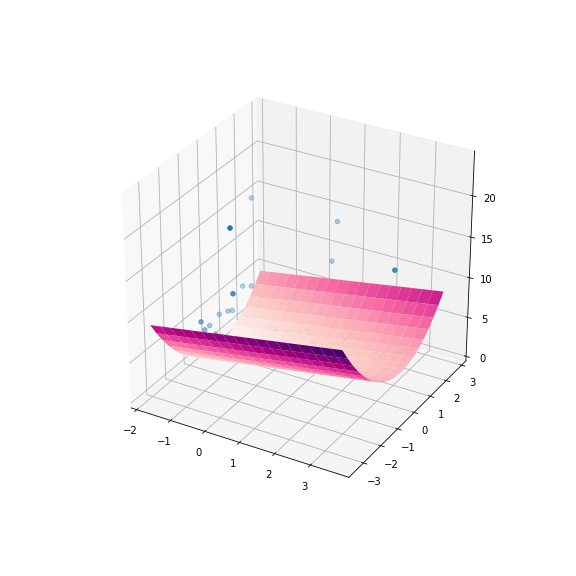

In [23]:
regression_quad = RidgeRegression(lambda_=quad_model.optimize(), ftype='quad')
train_evaluate(regression_quad, X_quad, y_quad)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_quad, X_quad, y_quad)

MSE: 3.4189256376144836
MSE: 3.418925640038192
MSE: 3.4189258823652633
MSE: 3.418950071374365
MSE: 3.4213259144852293
MSE: 3.6214944277214562
MSE: 9.593978130354753


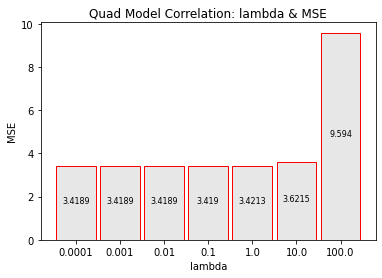

In [12]:
plot_bargraph('quad',X_quad, y_quad, 'lambda', 'MSE', 'Quad Model Correlation: lambda & MSE')

6) Trying to find a good model (including features and suitable `lambda_` parameters) for the noisy data set `(X_noise, y_noise)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

lambda* for 'lin' is -0.000101
MSE: 64.53876959048024


<IPython.core.display.Javascript object>


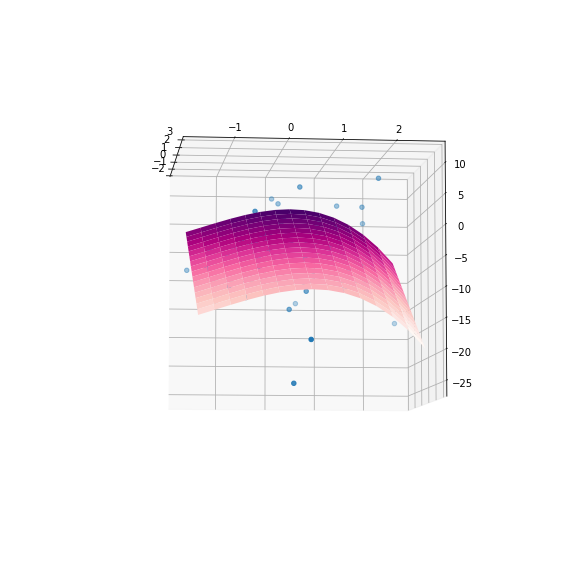

In [22]:
regression_noise = RidgeRegression(lambda_=noise_model.optimize(), ftype='cubic')
train_evaluate(regression_noise, X_noise, y_noise)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_noise, X_noise, y_noise)

MSE: 38.80903020036257
MSE: 38.80903020782203
MSE: 38.809030952674775
MSE: 38.80910436989552
MSE: 38.81557935822248
MSE: 39.157655985628374
MSE: 42.98439809019198


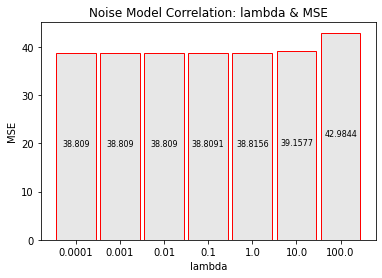

In [14]:
plot_bargraph('cubic', X_noise, y_noise, 'lambda', 'MSE', 'Noise Model Correlation: lambda & MSE')

4) Implementation of the function `cross_validation` to evaluate the prediction error of your model. Report the mean squared error from cross-validation. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

<IPython.core.display.Javascript object>


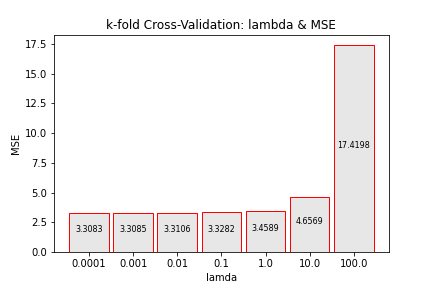

In [20]:
def cross_validation(regression_model, X, y, k, shuffle):
    
    if shuffle == True:
        #Shuffle
        data = list(zip(X,y))
        np.random.shuffle(data)
        X,y = zip(*data) 
    else:
        pass
    
    #Create data chunks
    X_chunk = np.array_split(X, k)
    y_chunk = np.array_split(y, k)
    
    #Validate 
    indices = list(range(k))
    for i in range(k):
        X_test = X_chunk[i]
        y_test = y_chunk[i]
        X_train = np.empty([1,5])
        y_train = np.empty([1])
        indices.remove(i)
        
        for j in indices:
            X_train = np.vstack((X_train, X_chunk[j]))
            y_train = np.hstack((y_train, y_chunk[j]))
          
        X_train = np.delete(X_train, 0, axis=0)
        y_train = np.delete(y_train, 0, axis=0)

        assert len(X_test)+len(X_train) == len(X)
        assert len(y_test)+len(y_train) == len(y)
        
        regression_model.fit(X_train,y_train)
        ycap = regression_model.predict(X_test)
        score = np.sum(MSE(ycap, y_test))
        
        indices.append(i)
        
    return(score/k)

# k = 10 , FOLDS!
import matplotlib.pyplot as plt
%matplotlib notebook

l = list()
for i in range(7):
    _i = np.power(10,i)*0.0001
    your_regression = RidgeRegression(lambda_=_i, ftype='nasa')
    l.append((_i,cross_validation(your_regression, X, y, 10, False)))

labels, y_axis = zip(*l)
x_axis = np.arange(len(labels)) 
width =0.9

plt.bar(x_axis, y_axis, width, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red')

for i, y_axis in enumerate(y_axis):
    plt.text(i, y_axis/2, str(np.around(y_axis,4)), ha='center', fontsize =8)

plt.xlabel('lamda')
plt.ylabel('MSE')
plt.xticks(x_axis, labels)
plt.title('k-fold Cross-Validation: lambda & MSE');

<IPython.core.display.Javascript object>


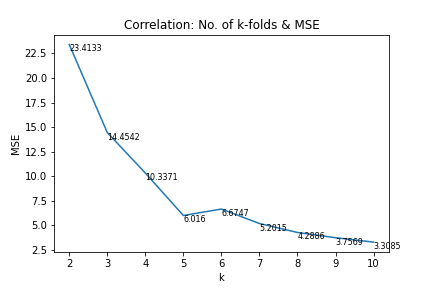

In [21]:
# k = 2~10, FOLDS!
import matplotlib.pyplot as plt
%matplotlib notebook

m = list()
for _k in range (2,11):
    l = list()
    for i in range(5):
        _i = np.power(10,i)*0.001
        your_regression = RidgeRegression(lambda_=_i, ftype='nasa')
        l.append((_i,cross_validation(your_regression, X, y, _k, False)))

    l.sort(key=lambda x:x[1])
    m.append((_k,l[0][1]))
labels, y_axis = zip(*m)
x_axis = np.arange(len(labels)) 

plt.plot(x_axis, y_axis)

for i, y_axis in enumerate(y_axis):
    plt.text(i, y_axis, str(np.around(y_axis,4)), ha='left', va='top', fontsize =8)

plt.xlabel('k')
plt.ylabel('MSE')
plt.xticks(x_axis,labels)
plt.title('Correlation: No. of k-folds & MSE');